## 1. Optimization problem example
The surface area of circular cylindrical can: 
\begin{equation} \label{eq:area}
A=2 \pi r h+2 \pi r^{2}
\end{equation}
The volume of circular cylindrical can: 
\begin{equation} \label{eq:volume}
V=\pi r^{2} h 
\end{equation}
$$h=\frac{V}{\pi r^{2}}$$
The objective function:
\begin{equation} \label{eq:obj1}
A \rightarrow \min_{r,h \in \mathbb{R}}
\end{equation}
From area equation
\begin{align*} 
A &= 2 \pi r \frac{V}{\pi r^{2}} +2 \pi r^{2} \\
A &= \frac{2V}{r} +2 \pi r^{2} \\
\frac{\partial A}{\partial r} &= -2Vr^{-2} + 4\pi r \\ 
0  &= -2Vr^{-2} + 4\pi r 
\end{align*} 
So that 
\begin{align*} 
r^* &= \sqrt[3]{\frac{V}{2\pi}} \\
h^* &= \sqrt[3]{\frac{4V}{\pi}}
\end{align*} 

## 2. Optimally conditions

According to the optimality condition:
- $\nabla f\left(x^{*}\right)=0 \quad\left(f^{\prime}\left(x^{*}\right)=0\right)$
- $\nabla^{2} f\left(x^{*}\right) \succ 0 \quad\left(f^{\prime \prime}\left(x^{*}\right)=0\right)$ where $\nabla^{2} f\left(x^{*}\right)$ called Hessian matrix

--> First derivative:
$$
\begin{gathered}
\frac{\partial f\left(x_{1}, x_{2}\right)}{\partial x_{1}}=3 x_{1}+(1+a) x_{2}-1 \\
\frac{\partial f\left(x_{1}, x_{2}\right)}{\partial x_{2}}=3 x_{2}+(1+a) x_{1}-1 \\
\nabla f\left(x^{*}\right)=\left[\begin{array}{l}
3 x_{1}+(1+a) x_{2}-1 \\
(1+a) x_{1}+3 x_{2}-1
\end{array}\right]=0
\end{gathered}
$$
--> Second derivative: 
$$
\left[\begin{array}{cc}
3 & 1+a \\
1+a & 3
\end{array}\right]\left[\begin{array}{l}
x_{1} \\
x_{2}
\end{array}\right]=\left[\begin{array}{l}
1 \\
1
\end{array}\right]
$$
Take derivative again
$$
\nabla^{2} f\left(x^{*}\right)=\left[\begin{array}{cc}
3 & 1+a \\
1+a & 3
\end{array}\right]=0
$$
The determinant of a positive definite matrix is always positive
$$
\begin{aligned}
&\mid \text { Hessian matrix } \mid>0 \\
&\qquad \begin{array}|
3 & 1+a \\
1+a & 3
\end{array} >0 \\
&9-(1+a)^{2}>0 \\
&-4<a<2\\
\end{aligned}
$$
$$ a \in (-4,2) \text{ and } b \in \mathbb{R} $$

## 3. Nelder-Mead method
Implement Nelder-Mead method for the Mishra's Bird function
$$
f(x, y)=\sin (y) e^{(1-\cos (x))^{2}}+\cos (x) e^{(1-\sin (y))^{2}}+(x-y)^{2}
$$
subjected to, $(x+5)^{2}+(y+5)^{2}<25$

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
def mishra_func_feasi(x):  
    obj_f = math.sin(x[1])*math.exp((1 - math.cos(x[0]))**2) + math.cos(x[0])*math.exp((1 - math.sin(x[1]))**2) + (x[0] - x[1])**2
    return obj_f  

def mishra_func(x): 
    if (x[0] + 5)**2 + (x[1] + 5)**2 < 25:
        obj_f = math.sin(x[1])*math.exp((1 - math.cos(x[0]))**2) + math.cos(x[0])*math.exp((1 - math.sin(x[1]))**2) + (x[0] - x[1])**2
    else:
        obj_f = 10**10
    return obj_f

#### 3.1 
To illustrate the behavior of the methods plot simplex (triangle) for every iteration. Provide
the link to code repository.

In [3]:
def plot_simplex():
    X = np.arange(-10, 0.1, 0.1)
    Y = np.arange(-10, 0.1, 0.1)
    X, Y = np.meshgrid(X, Y)
    fv = np.vectorize(mishra_func_feasi, signature='(2)->()') # apply x and y coordinate into Mishra function
    Z = fv(np.stack((X, Y), axis=-1))
    fig, ax = plt.subplots(figsize= (10,10)) 
    ax.add_patch(Circle((-5, -5), 5, color='whitesmoke', alpha=0.4)) # according to constraint 
    plt.contourf(X, Y, Z)
    plt.title("Feasible region of Mishra's Bird function")  
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True) 

In [4]:
# ver 1
def nelder_mead(mishra_func, v1, v2, v3, iter_n = 200, alpha = 1, gamma = 0.5, beta = 2):
    tolerance = 1e-10
    oracle_calls = 0 # it will be called everytime that mishra_func was called 
    plot_simplex()
    iter_nm = 0
    diff_bg = 1
    while iter_nm < iter_n and diff_bg > tolerance:
#     for i in range(iter_n):
        dict_v = {tuple(v1): mishra_func(v1), tuple(v2):mishra_func(v2), tuple(v3): mishra_func(v3)}
        points = sorted(dict_v.items(), key=lambda x:x[1])
        b = points[0][0] # the lowest value x_l
        g = points[1][0] # the middle value x_g
        w = points[2][0] # the highest value x_h
        bi = np.asarray(b)
        gi = np.asarray(g)
        wi = np.asarray(w)
        x_c = (gi+bi)/2  
        plt.plot([bi[0],gi[0],wi[0],bi[0]], [bi[1],gi[1],wi[1],bi[1]], "-.") 
        # reflection comparing xr/c/w
        xr = x_c + alpha * (x_c - wi)    
        if mishra_func(xr) < mishra_func(gi): # found new high value  f_r <= f_l
            oracle_calls += 1
            wi = xr
        else: # cannot found, so change x_w
            if mishra_func(xr) < mishra_func(wi):
                oracle_calls += 1
                wi = xr
            c = (w + x_c)/2
            if mishra_func(c) < mishra_func(wi):
                oracle_calls += 1
                wi = c 
        # expansion
        if mishra_func(xr) < mishra_func(bi):
            oracle_calls += 1
            xe = x_c + gamma * (xr - x_c)
            if mishra_func(xe) < mishra_func(xr): # f_l > f_e
                oracle_calls += 1
                wi = xe # x_h = x_e
            else: # f_l < f_e
                wi = xr # x_h = x_r
        # contraction
        if mishra_func(xr) > mishra_func(wi): # f_r > f_h  
            oracle_calls += 1
            x_s = x_c + beta * (wi - x_c)  
            if mishra_func(x_s) < mishra_func(wi): # f_s or f_c < f_h   
                oracle_calls += 1
                wi = x_s # x_s or x_c = x_h   
        # update points
        v1 = wi
        v2 = gi
        v3 = bi 
        fv = np.vectorize(mishra_func_feasi, signature='(2)->()')
        bi_d = fv(bi)
        gi_d = fv(gi)
        diff_bg = abs(bi_d-gi_d)
#         if abs(mishra_func(bi) - mishra_func(gi)) < tolerance:
#             break
    return v1, oracle_calls 

The optimal value is [-3.13024688 -1.58214315]
The number of oracle calles: 123


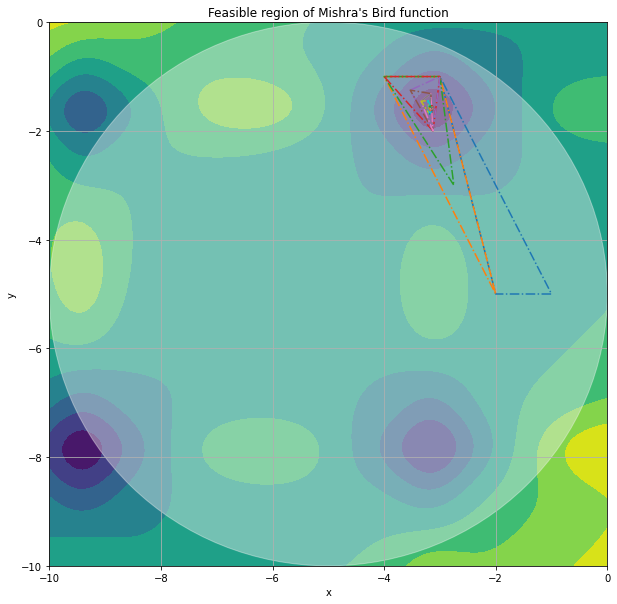

In [5]:
v1 = (-2,-5) #np.array([0,0])
v2 = (-1,-5) #np.array([1.0,0])
v3 = (-3,-1) #np.array([0,1.0]) 
simplex, oracle_calls1 = nelder_mead(mishra_func, v1, v2, v3)
print(f"The optimal value is {simplex}\nThe number of oracle calles: {oracle_calls1}")

3.2

Demonstrate that the algorithm may converge to different points depending on the starting
point. Report explicitly two distinct starting points $x^0$ and the corresponding $x^∗$.

The optimal value is [-5.37767161 -5.61790534]
The number of oracle calles: 91


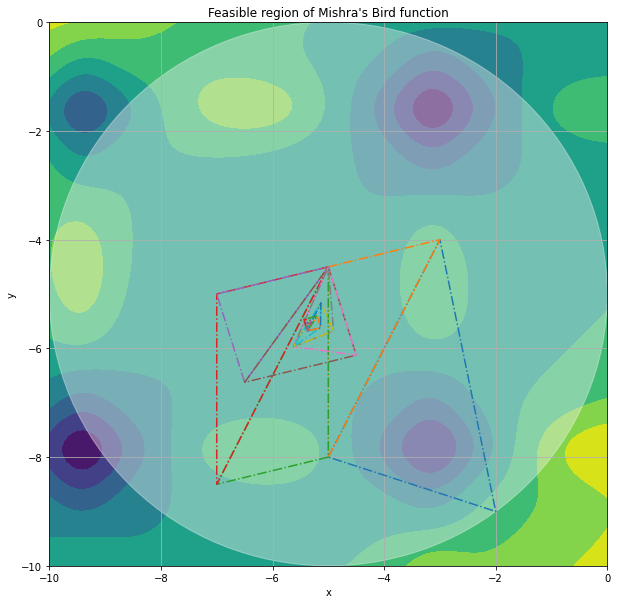

In [6]:
v1 = (-2,-9) #np.array([0,0])
v2 = (-5,-8) #np.array([1.0,0])
v3 = (-3,-4) #np.array([0,1.0]) 
simplex, oracle_calls1 = nelder_mead(mishra_func, v1, v2, v3)
print(f"The optimal value is {simplex}\nThe number of oracle calles: {oracle_calls1}")

#### 3.3

Examine the behavior of the method for various parameters α, β and γ. For one chosen $x^0$
show that the method may converge to different points. Report parameter values and $x^∗$.

##### solution
The final result may different. Algorithm converge to the local minima, instead of global due to different parameter.
$\begin{array}{lcc}
\hline & \text { $\alpha$ } & \text { $\gamma$ } & \text { $\beta$ } & \text { # Orcacle calls } & \text { Final value }\\
\hline \text { Default} & 1 & 0.5 & 2 & 123 & (-3.13024688, -1.58214315) \\
\text { case 1 } & 4 & 0.5 & 2 & 132 & (-2.82159983, -1.47764212)  \\
\text { case 2 } & 1 & 1.5 & 2 & 105 & (-3.13024683, -1.58214145) \\
\text { case 3 } & 1 & 0.5 & 4 & 123 & (-3.13024688, -1.58214315) \\
\hline
\end{array}$
 

(array([-2.82159983, -1.47764212]), 132)

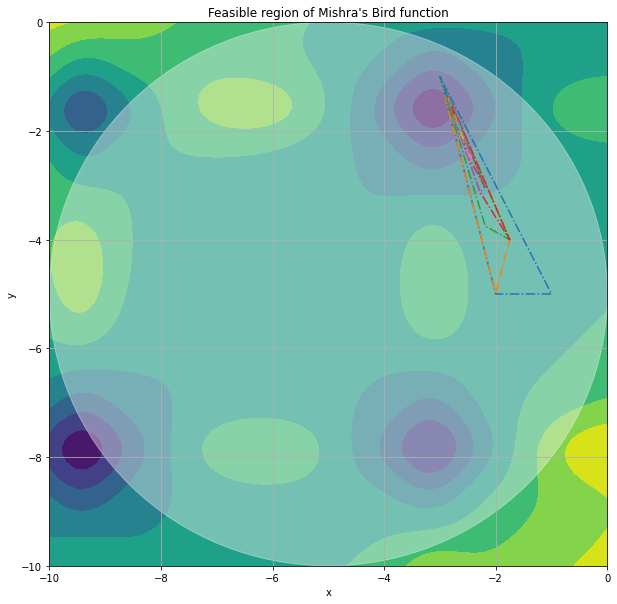

In [7]:
v1 = (-2,-5)  
v2 = (-1,-5)  
v3 = (-3,-1) 
nelder_mead(mishra_func, v1, v2, v3, iter_n = 100, alpha = 4, gamma = 0.5, beta = 2)

(array([-3.13024683, -1.58214145]), 105)

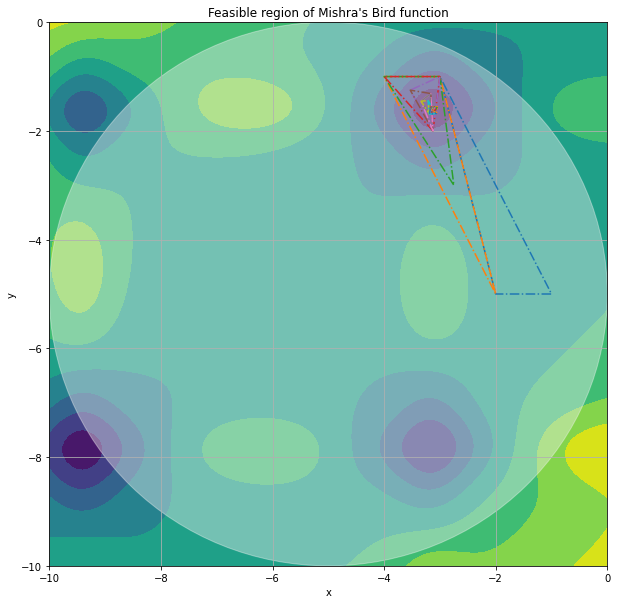

In [8]:
nelder_mead(mishra_func, v1, v2, v3, iter_n = 100, alpha = 1, gamma = 1.5, beta = 2)

(array([-3.13024688, -1.58214315]), 123)

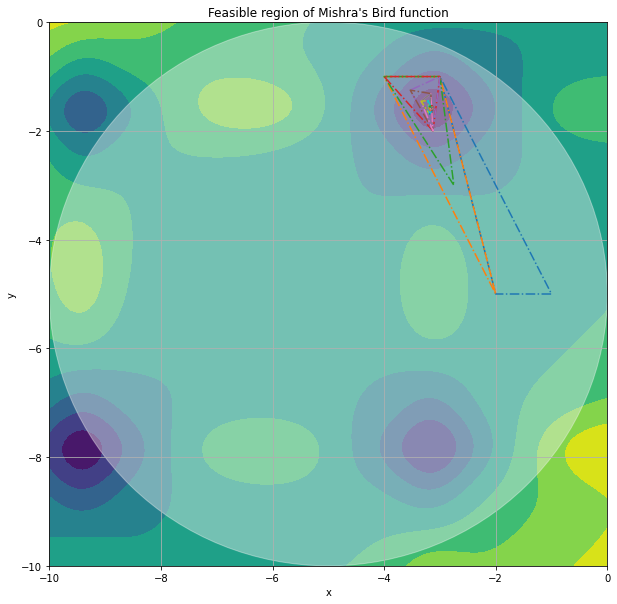

In [9]:
nelder_mead(mishra_func, v1, v2, v3, iter_n = 100, alpha = 1, gamma = 0.5, beta = 5)

## 4. Coordinate descend

Implement coordinate descend for $x^0$ and f from Task 3. Compare the number of function evaluations (Oracle calls) for Nelder Mead algorithm and Coordinate descend. Report parameters of the algorithm. Provide the link to code repository. Make a conclusion.

#### solution:
Both methods are able to reach pretty the same final value if the inital value is the same (in this case, $x^0=(-3,-5)$). $\\ \\ $
Coordinate descend use higer number of oracle call. The performance of Nelder Mead is better. 

iteration: 100
oracle calls: 200
x: [-3.10110158 -1.6112874 ]


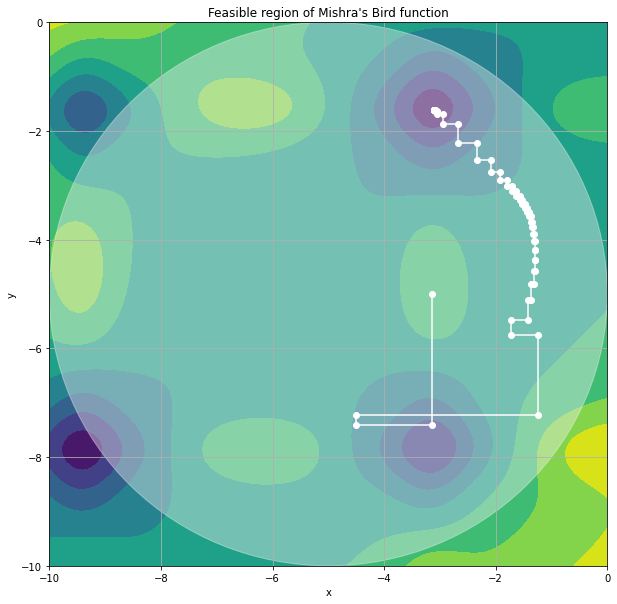

In [13]:
def coordinate_descend(x0, tol = 1e-10, max_iter = 100,gamma_0 = 1e-1, alpha_k = 1e-1): 
    x = x0.copy() 
    oracle_calls = 0
    iterations = 0 
    oracle_calls = 0 
    x_list = []   
    x_diff = 1e-3
    while x_diff>tol and iterations < max_iter:# and x_diff <= 1e-6:
        iterations += 1 
        if iterations % 2 == 0:
            h_i = np.array([0,1])
        elif iterations % 2 == 1:
            h_i = np.array([1,0]) 
        s_k = (1/2*alpha_k)*(mishra_func(x + alpha_k*h_i) - mishra_func(x - alpha_k*h_i))*h_i
        oracle_calls += 2     
        gamma_k = gamma_0/(iterations)
        x_prev = x
        x = x - gamma_k * s_k  
        x_prev_v = np.vectorize(mishra_func, signature='(2)->()')
        x_curr_v = np.vectorize(mishra_func, signature='(2)->()')
        x_diff = abs(x_prev_v(x_prev)-x_curr_v(x))
        x_list.append(x) 
        
    print(f'iteration: {iterations}\noracle calls: {oracle_calls}\nx: {x}')     
    return x,x_list,oracle_calls


x0 = np.array([-3,-5]) 
x_f,x_list_f,oracle_calls_f = coordinate_descend(x0, gamma_0 = 0.5,alpha_k = 1)


x_list_a = np.array(x_list_f)
plot_simplex()
plt.plot(x_list_a[:,0], x_list_a[:,1], 'o-', color = 'w')

The optimal value is [-3.13024614 -1.58214301]
The number of oracle calles: 127


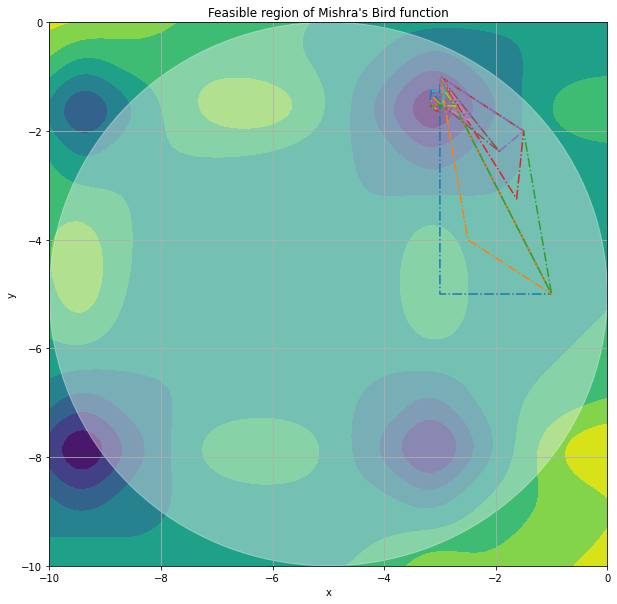

In [14]:
v1 = (-3,-5) #np.array([0,0])
v2 = (-1,-5) #np.array([1.0,0])
v3 = (-3,-1) #np.array([0,1.0]) 
simplex, oracle_calls1 = nelder_mead(mishra_func, v1, v2, v3)
print(f"The optimal value is {simplex}\nThe number of oracle calles: {oracle_calls1}")